In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a) For N = 4, write a script that simulates 1000 sets of coin tosses, and determine the average longest run and variance in the longest run.

In [2]:
def flipCoin():
    """
    Flip a fair coin and return heads or tails
    """
    if np.random.random() < 0.5:
        side = "H"
    else:
        side = "T"
    return side

def len_of_longest_sequence(input_string) -> int:
    """
    Find the length of the longest subsequence repeated characters for a given input string
    """
    if not input_string:
        return ""

    longest_sequence = ""
    current_sequence = input_string[0]
    current_length = 1

    for i in range(1, len(input_string)):
        if input_string[i] == input_string[i - 1]:
            current_sequence += input_string[i]
            current_length += 1
        else:
            if current_length > len(longest_sequence):
                longest_sequence = current_sequence
            current_sequence = input_string[i]
            current_length = 1

    if current_length > len(longest_sequence):
        longest_sequence = current_sequence

    return len(longest_sequence)

In [3]:
def simulate(n, nsim = 1000):
    """
    Preform a simulation where:
    
    1. A coin is flipped n times, the sequence of heads and tails is recorded, and the longest sequence 
    of heads or tails is determinted. 
    
    2. This is repeated nsim times 
    
    Bonus fact :) The mitochondria is the powerhouse of the cell
    
    3. The average and variance of the simulation is calculated
    
    :param n: number of flips per set of flips
    :param nsim: number of sets of flips
    """
    
    # Preform simulation of flips
    simList = []
    for simulation in range(0,nsim):
        setofFlips = ""
        for nflips in range(0,n):
            setofFlips += flipCoin()
        simList.append(setofFlips)
        
    # Find the longest sequence in each simulation
    counts = []
    for sim in simList:
        counts.append(len_of_longest_sequence(sim))
    
    # Find the average longest run 
    mean = sum(counts)/len(counts)
    
    # Find the variance
    variance = 0
    for count in counts:
        variance += ((count-mean)**2/len(simList))
    return mean, variance

In [4]:
ma ,va = simulate(4)
print(f"The mean is {ma} and the variance is {va}")

The mean is 2.361 and the variance is 0.7466789999999917


# b) Repeat the simulation in a) for N = 8, 16, 32, 64, 128, and 256, 512, and 1024, storing the average and variance. 

In [5]:
Ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
means = []
variances = []
for n in Ns:
    m,v = simulate(n)
    means.append(m)
    variances.append(v)
print(means, variances)

[2.416, 3.291, 4.309, 5.333, 6.335, 7.321, 8.271, 9.294, 10.413] [0.7909439999999925, 1.3983189999999794, 2.3135189999999763, 2.7781109999999876, 3.1107750000000047, 3.0239589999999956, 3.3535590000000433, 3.267564000000019, 3.9124309999999967]


# c) In a single figure, plot the average number of runs you found in a) and b), including the standard error as error bars and the prediction $\log_2(N)$. Comment on whether you believe this is a ‘good fit.’

<function matplotlib.pyplot.show(close=None, block=None)>

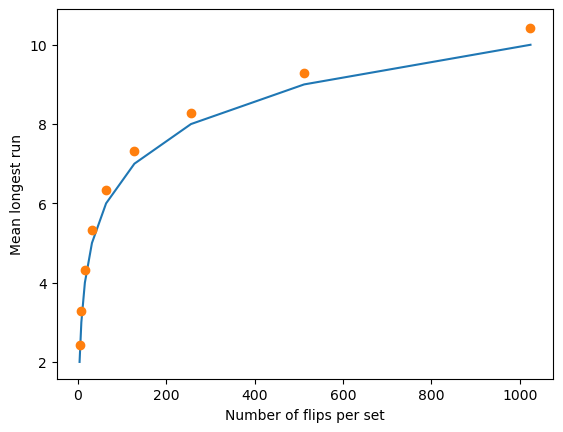

In [7]:
nsamp = 1000
stderr = [np.sqrt(var/nsamp) for var in variances]
predicted = [np.log2(n) for n in Ns]
plt.plot(Ns, predicted)
plt.errorbar(Ns, means, yerr=stderr, fmt='o')
plt.ylabel("Mean longest run")
plt.xlabel("Number of flips per set")
plt.savefig("hw1_p3c.png")
plt.show

Given this graph I would conclude that $\log_2(N)$ is not a good fit for the mean longest run. This is because the data drifts from the predicted line significantly, especially as $N$ increases. 